In [1]:
import pandas as pd
import numpy as np

from   sklearn.model_selection import train_test_split
from   sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

import shap
from   interpret.glassbox import ExplainableBoostingRegressor

In [2]:
url       = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
file_name = 'wine/wine.csv'
try:
    wine = pd.read_csv(file_name)
except FileNotFoundError:
    print('File not found')
    wine = pd.read_csv(url, sep=";")
    wine.to_csv(file_name, index=False)

y = wine['quality']
X = wine.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
model = ExplainableBoostingRegressor(interactions=0)
model.fit(X_train, y_train)

ExplainableBoostingRegressor(interactions=0)

In [4]:
y_pred = model.predict(X_test)
mae    = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

MAE: 0.55


In [5]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 981it [00:20, 30.18it/s]                         


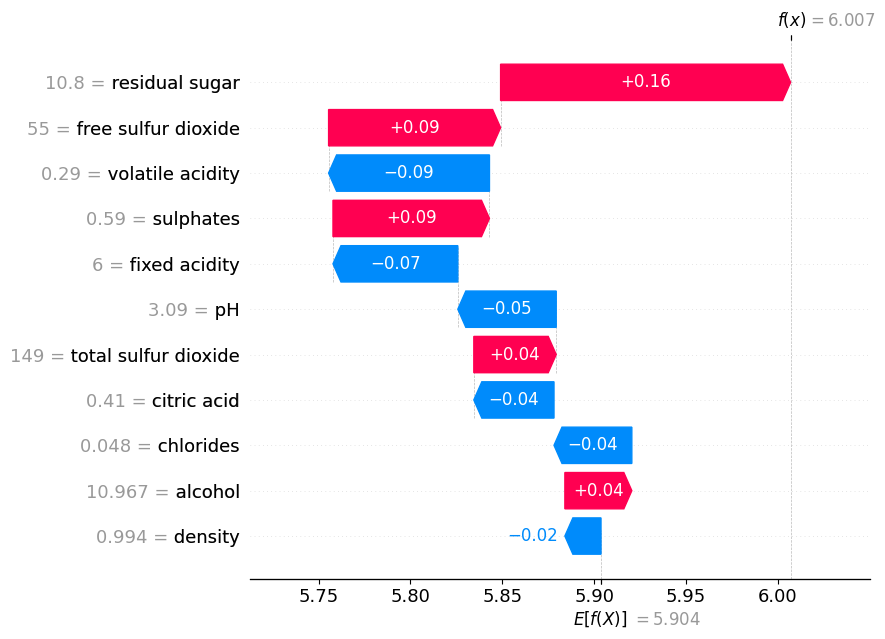

In [6]:
shap.plots.waterfall(shap_values[0], max_display=15)

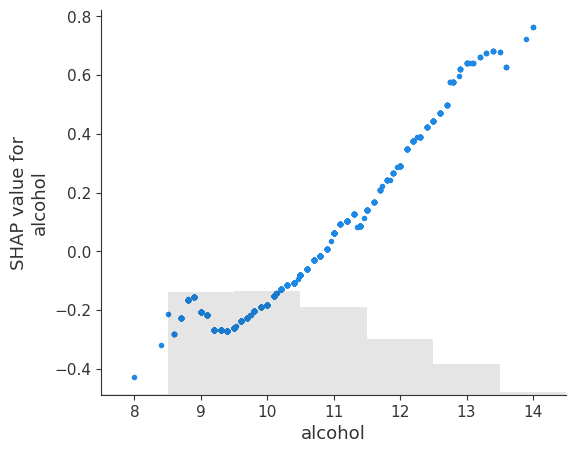

In [8]:
shap.plots.scatter(shap_values[:, 'alcohol'])

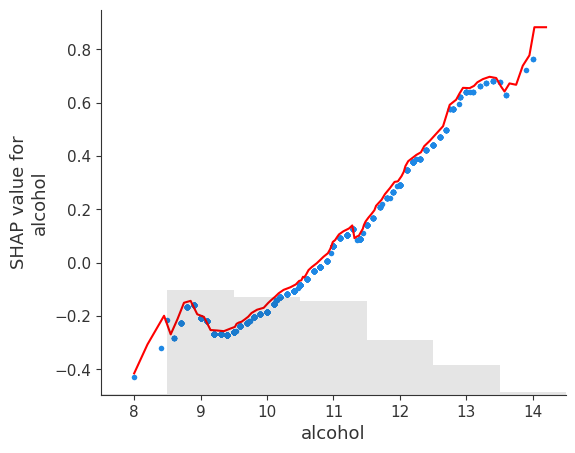

In [7]:
shap.plots.scatter(shap_values[:, 'alcohol'], show=False)

idx = model.explain_global().data()['names'].index('alcohol') #idx = 10

explain_data = model.explain_global().data(idx)

x_data = explain_data['names']
y_data = explain_data['scores']
y_data = np.r_[y_data, y_data[-1]] # adds the last datapoint to y_data to make x_data and y_data same length
plt.plot(x_data, y_data, color='red')

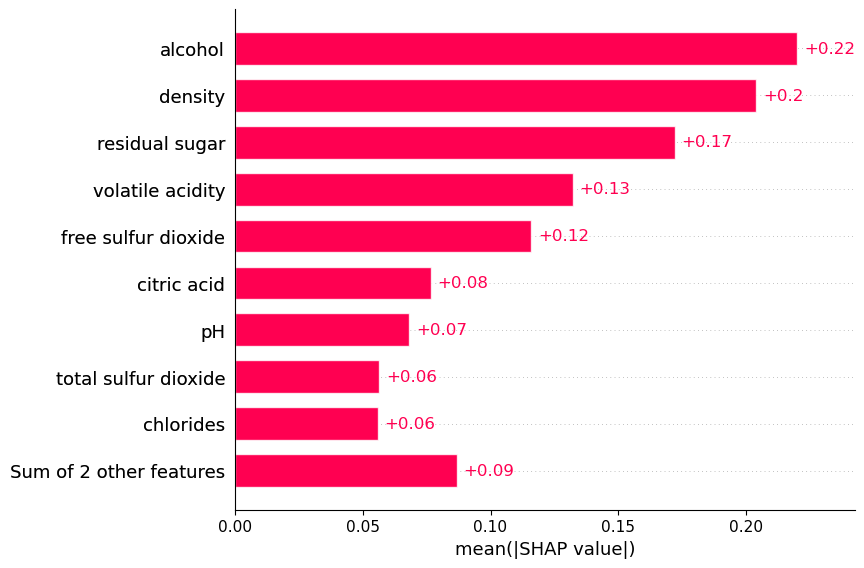

In [10]:
shap.plots.bar(shap_values)